### Importing Important Libraries 


*   Numpy- Used for Linear Algebra
*   Pandas - Used for data processing / reading dataset
*   Seaborn and Matplotlib - Used for graphical representation



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


Reading and Viewing the dataset using Pandas

In [ ]:

import time
import datetime


ticker = 'INFY.NS'
period1 = int(time.mktime(datetime.datetime(2000, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 6, 6, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
df.to_csv('INFY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,122.070313,122.071877,122.070313,122.071877,84.002754,657536.0
1,2000-01-04,131.250000,131.837891,126.976563,131.686722,90.619118,7191808.0
2,2000-01-05,122.664063,126.953125,121.151955,121.151955,83.369713,21069440.0
3,2000-01-06,119.192581,119.531250,111.459763,111.459763,76.700089,10495616.0
4,2000-01-07,102.542969,102.542969,102.542969,102.542969,70.564087,971392.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,122.070313,122.071877,122.070313,122.071877,84.002754,657536.0
1,2000-01-04,131.250000,131.837891,126.976563,131.686722,90.619118,7191808.0
2,2000-01-05,122.664063,126.953125,121.151955,121.151955,83.369713,21069440.0
3,2000-01-06,119.192581,119.531250,111.459763,111.459763,76.700089,10495616.0
4,2000-01-07,102.542969,102.542969,102.542969,102.542969,70.564087,971392.0


Plotting a Correlation Heatmap

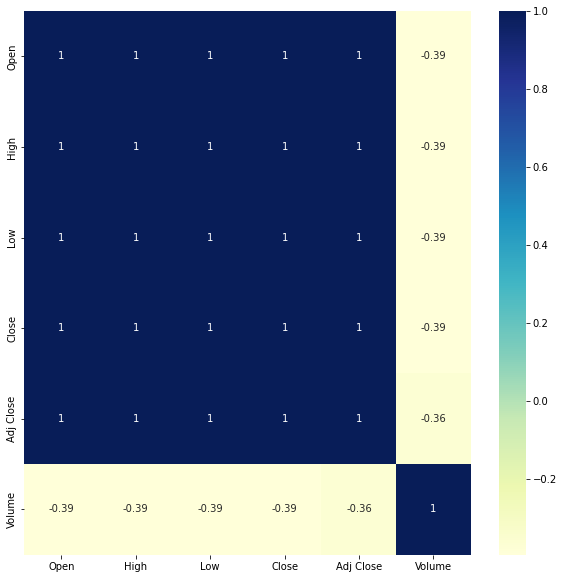

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Generating New Features based on Important features

In [ ]:
data = df[['Date','Open','High','Low','Volume',]]

Setting Index as Date

In [ ]:
df.set_index("Date", drop=False, inplace=True)

Visual Representation of Closing Price

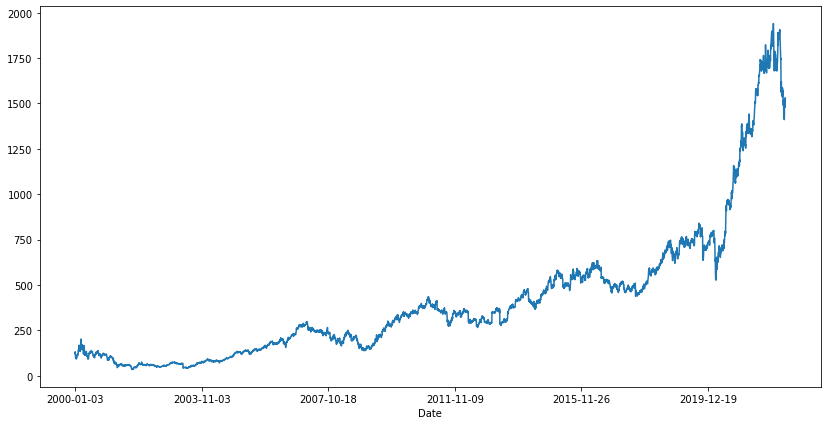

In [ ]:
df.Close.plot(figsize=(14, 7))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5612 non-null   object 
 1   Open    5605 non-null   float64
 2   High    5605 non-null   float64
 3   Low     5605 non-null   float64
 4   Volume  5605 non-null   float64
dtypes: float64(4), object(1)
memory usage: 219.3+ KB


Generating New Features - Lag and Window Features for features related to Closing Price

In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

Setting All Null/NaN values of a feature as mean of that feature

In [ ]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Setting Date as Index and viewing Dataset

In [ ]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7
Date,,,,,,,,,,,,,
2000-01-03,2000-01-03,122.070313,122.071877,122.070313,122.071877,84.002754,657536.0,411.425446,7.265625,416.207184,7.004477,406.507935,7.000870
2000-01-04,2000-01-04,131.250000,131.837891,126.976563,131.686722,90.619118,7191808.0,122.070312,7.265625,122.071877,7.004477,122.070312,7.000870
2000-01-05,2000-01-05,122.664063,126.953125,121.151955,121.151955,83.369713,21069440.0,126.660156,6.491019,126.954887,6.905615,124.523438,3.469243
2000-01-06,2000-01-06,119.192581,119.531250,111.459763,111.459763,76.700089,10495616.0,125.328125,5.137079,126.954300,4.883007,123.399612,3.131579
2000-01-07,2000-01-07,102.542969,102.542969,102.542969,102.542969,70.564087,971392.0,124.368881,5.196565,126.107422,5.447132,119.862762,6.494447


Extracting Date Time Features from the dataset 


In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,122.070313,122.071877,122.070313,122.071877,84.002754,657536.0,411.425446,7.265625,416.207184,7.004477,406.507935,7.000870,1,3,0
2000-01-04,2000-01-04,131.250000,131.837891,126.976563,131.686722,90.619118,7191808.0,122.070312,7.265625,122.071877,7.004477,122.070312,7.000870,1,4,1
2000-01-05,2000-01-05,122.664063,126.953125,121.151955,121.151955,83.369713,21069440.0,126.660156,6.491019,126.954887,6.905615,124.523438,3.469243,1,5,2
2000-01-06,2000-01-06,119.192581,119.531250,111.459763,111.459763,76.700089,10495616.0,125.328125,5.137079,126.954300,4.883007,123.399612,3.131579,1,6,3
2000-01-07,2000-01-07,102.542969,102.542969,102.542969,102.542969,70.564087,971392.0,124.368881,5.196565,126.107422,5.447132,119.862762,6.494447,1,7,4


Splitting Dataset into Training and Testing Data

In [ ]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [ ]:
df_train.shape

(4519, 16)

In [ ]:
df_valid.shape

(1093, 16)

In [ ]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Open,122.070313,131.25,122.664063,119.192581,102.542969
High,122.071877,131.837891,126.953125,119.53125,102.542969
Low,122.070313,126.976563,121.151955,111.459763,102.542969
Close,122.071877,131.686722,121.151955,111.459763,102.542969
Adj Close,84.002754,90.619118,83.369713,76.700089,70.564087
Volume,657536.0,7191808.0,21069440.0,10495616.0,971392.0
Open_mean_lag3,411.425446,122.070312,126.660156,125.328125,124.368881
Open_std_lag7,7.265625,7.265625,6.491019,5.137079,5.196565
High_mean_lag3,416.207184,122.071877,126.954887,126.9543,126.107422


Scaling Data and Transforming it for Training

In [ ]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [ ]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [ ]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [ ]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

### Importing XGBoost library

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost Tuning

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed.

We will go through some of them in this session

```
xgb = XGBRegressor(n_estimators=1000)
```

*   n_estimators specifies how many times to go through the modeling cycle described above.
*   Too low a value causes underfitting, which is inaccurate predictions on both training data and new data.
*    Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about).
*    You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate.

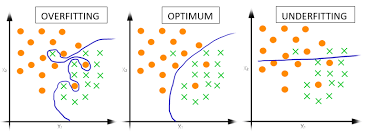

Example- [1](https://miro.medium.com/max/1838/1*4LnmIbcIiHM0g8q_XJrD7A.gif), [2](https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif)

```
xgb = XGBRegressor(learning_rate=0.01)
```

*   Learning Rate helps us in deciding the rate at which we want the parameters of model to change.
*   With a High Learning Rate a model can miss minimum loss.
*   For a low learning rate the process can be too slow.



```
xgb = XGBRegressor(max_depth=5)
```

*   It represents the depth of each tree, which is the maximum number of different features used in each tree. 
*   It's recommended going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. 
*   This will help simplify your model and avoid overfitting

```
xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)
```

*   Training Set
*   Evaluation Set
*   Verbose
*   Early Stopping 

```
xgb.fit(early_stopping_rounds='____')
```

*   The argument early_stopping_rounds offers a way to automatically find the ideal value.
*   Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators.


*   Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. 
*   early_stopping_rounds = 10 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.
*   It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

XGBoost has a multitude of other parameters, but these will go a very long way in helping you fine-tune your XGBoost model for optimal performance.

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[21:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.291935	validation_1-rmse:0.325936
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.289057	validation_1-rmse:0.322812
[2]	validation_0-rmse:0.286209	validation_1-rmse:0.319736
[3]	validation_0-rmse:0.283389	validation_1-rmse:0.316632
[4]	validation_0-rmse:0.280598	validation_1-rmse:0.313554
[5]	validation_0-rmse:0.277833	validation_1-rmse:0.310477
[6]	validation_0-rmse:0.275098	validation_1-rmse:0.307541
[7]	validation_0-rmse:0.272389	validation_1-rmse:0.304562
[8]	validation_0-rmse:0.269708	validation_1-rmse:0.301687
[9]	validation_0-rmse:0.267053	validation_1-rmse:0.298737
[10]	validation_0-rmse:0.264425	validation_1-rmse:0.295897
[11]	validation_0-rmse:0.261822	validation_1-rmse:0.292991
[12]	validation

XGBRegressor(learning_rate=0.01, n_estimators=1000)

<Figure size 864x576 with 0 Axes>

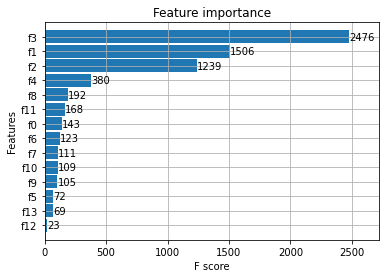

In [ ]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

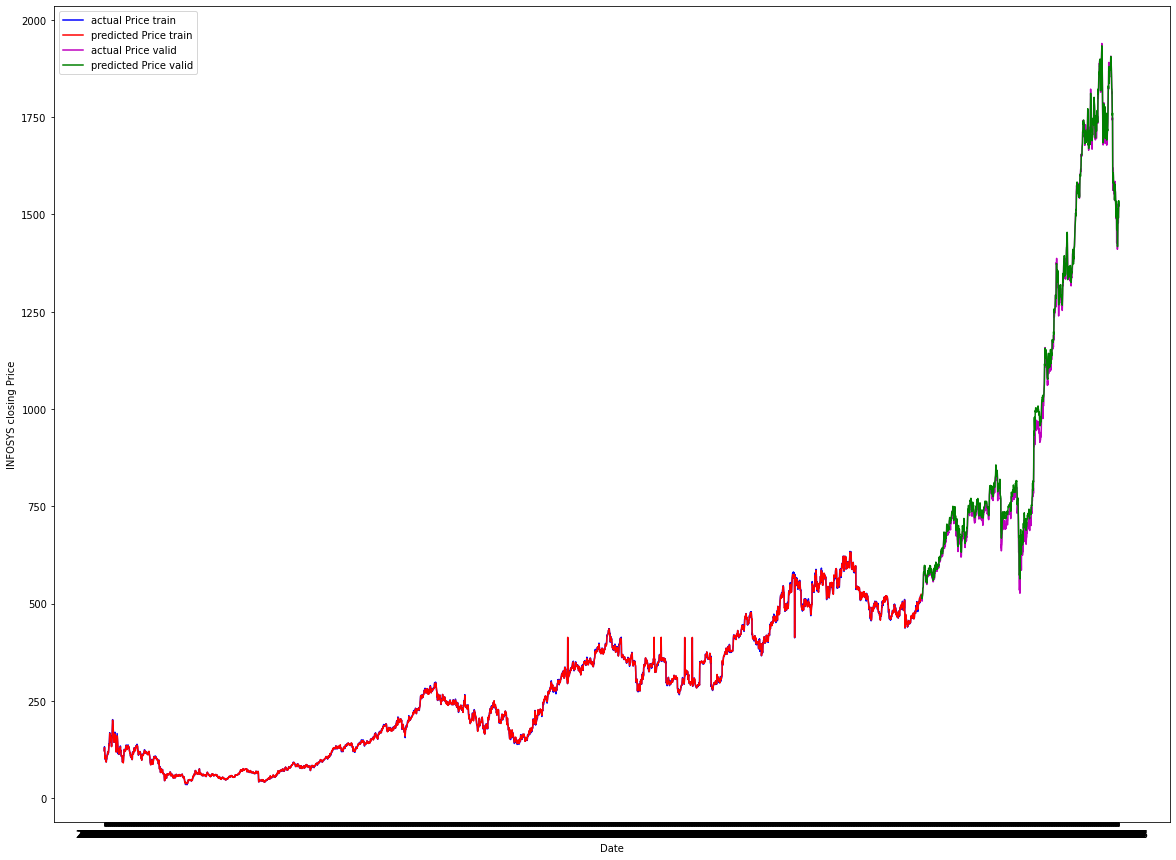

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('INFOSYS closing Price')
plt.legend()
plt.show()

Training Model Again 

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[21:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.291938	validation_1-rmse:0.325951
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.289065	validation_1-rmse:0.32286
[2]	validation_0-rmse:0.28622	validation_1-rmse:0.319777
[3]	validation_0-rmse:0.283402	validation_1-rmse:0.316756
[4]	validation_0-rmse:0.280613	validation_1-rmse:0.313723
[5]	validation_0-rmse:0.277851	validation_1-rmse:0.310726
[6]	validation_0-rmse:0.275116	validation_1-rmse:0.307745
[7]	validation_0-rmse:0.272408	validation_1-rmse:0.304807
[8]	validation_0-rmse:0.269727	validation_1-rmse:0.301888
[9]	validation_0-rmse:0.267072	validation_1-rmse:0.298967
[10]	validation_0-rmse:0.264444	validation_1-rmse:0.296137
[11]	validation_0-rmse:0.261841	validation_1-rmse:0.293321
[12]	validation_0

XGBRegressor(learning_rate=0.0099, max_depth=15, n_estimators=1000)

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

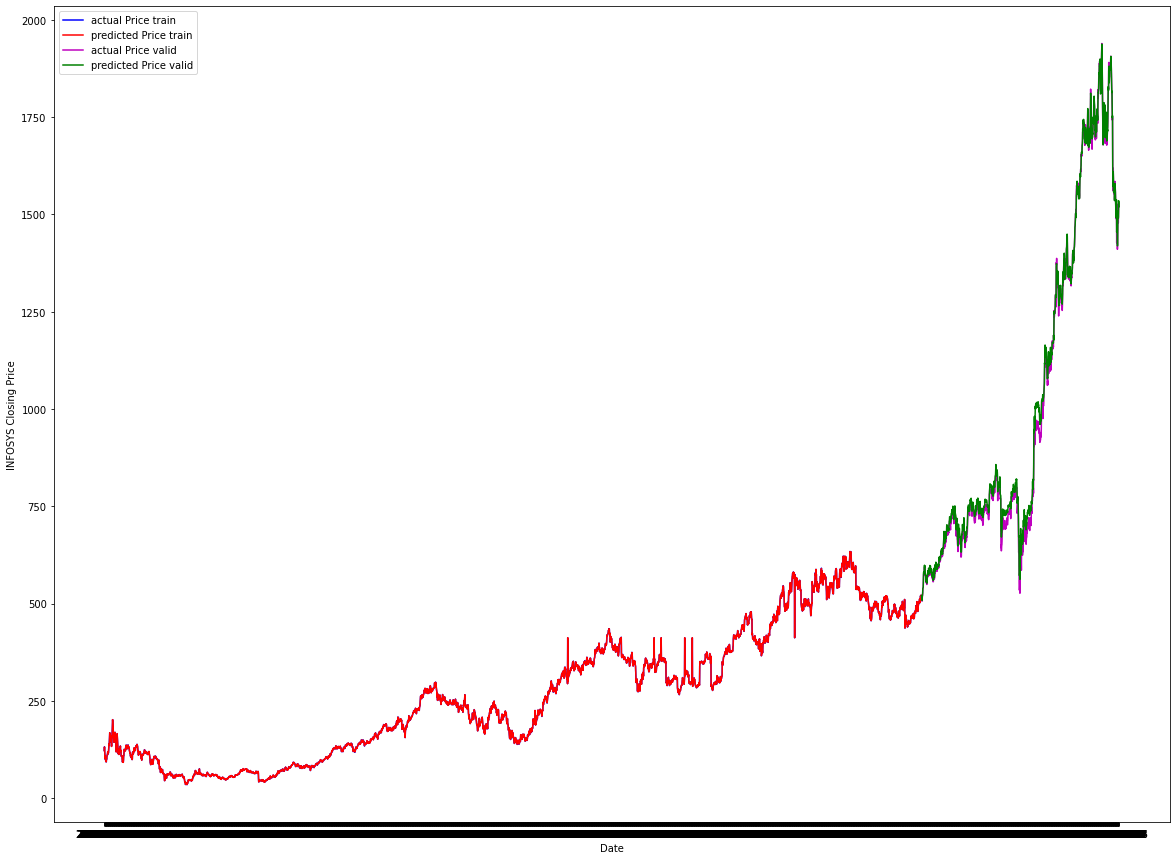

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('INFOSYS Closing Price')
plt.legend()
plt.show()

#                  ***PREDICTIONS OF TCS STOCKS ***


### Importing Important Libraries 


*   Numpy- Used for Linear Algebra
*   Pandas - Used for data processing / reading dataset
*   Seaborn and Matplotlib - Used for graphical representation



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


Reading and Viewing the dataset using Pandas

In [ ]:

import time
import datetime


ticker = 'TCS.NS'
period1 = int(time.mktime(datetime.datetime(2000, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 6, 6, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('TCS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.214134,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.818594,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.831747,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.831747,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.767345,811856.0


Plotting a Correlation Heatmap

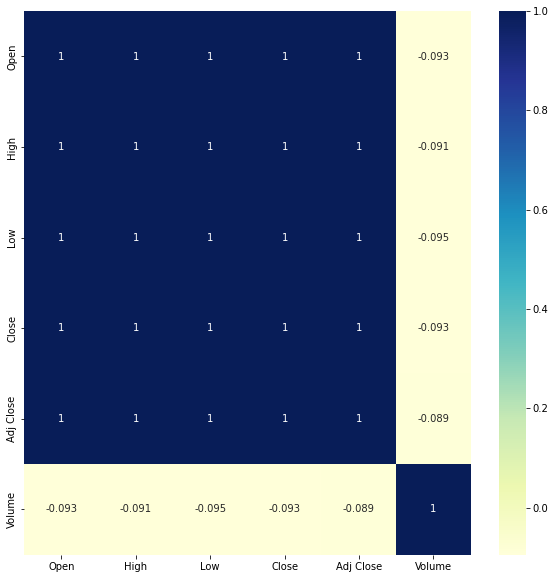

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Generating New Features based on Important features

In [ ]:
data = df[['Date','Open','High','Low','Volume']]

Setting Index as Date

In [ ]:
df.set_index("Date", drop=False, inplace=True)

Visual Representation of Closing Price

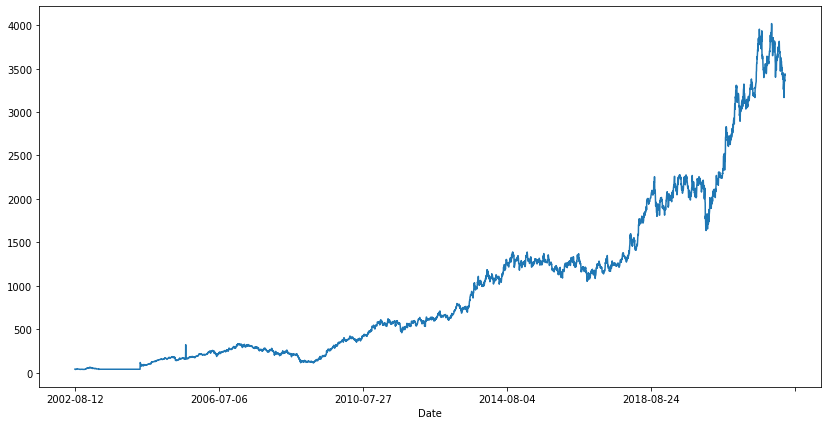

In [ ]:
df.Close.plot(figsize=(14, 7))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4932 non-null   object 
 1   Open    4923 non-null   float64
 2   High    4923 non-null   float64
 3   Low     4923 non-null   float64
 4   Volume  4923 non-null   float64
dtypes: float64(4), object(1)
memory usage: 192.8+ KB


Generating New Features - Lag and Window Features for features related to Closing Price

In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

Setting All Null/NaN values of a feature as mean of that feature

In [ ]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Setting Date as Index and viewing Dataset

In [ ]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7
Date,,,,,,,,,,,,,
2002-08-12,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.214134,212976.0,985.617615,15.893559,996.389465,14.965804,974.015198,15.192714
2002-08-13,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.818594,153576.0,38.724998,15.893559,40.000000,14.965804,38.724998,15.192714
2002-08-14,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.831747,822776.0,39.237499,0.724786,40.193752,0.274005,38.799999,0.106067
2002-08-15,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.831747,0.0,39.241665,0.512552,39.879166,0.578297,37.774998,1.776936
2002-08-16,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.767345,811856.0,38.487499,1.451233,38.700001,1.772386,37.020832,1.592377


Extracting Date Time Features from the dataset 


In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,
2002-08-12,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.214134,212976.0,985.617615,15.893559,996.389465,14.965804,974.015198,15.192714,8,12,0
2002-08-13,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.818594,153576.0,38.724998,15.893559,40.000000,14.965804,38.724998,15.192714,8,13,1
2002-08-14,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.831747,822776.0,39.237499,0.724786,40.193752,0.274005,38.799999,0.106067,8,14,2
2002-08-15,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.831747,0.0,39.241665,0.512552,39.879166,0.578297,37.774998,1.776936,8,15,3
2002-08-16,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.767345,811856.0,38.487499,1.451233,38.700001,1.772386,37.020832,1.592377,8,16,4


Splitting Dataset into Training and Testing Data

In [ ]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [ ]:
df_valid.shape

(1093, 16)

In [ ]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train.head().T

Date,2002-08-12,2002-08-13,2002-08-14,2002-08-15,2002-08-16
Date,2002-08-12 00:00:00,2002-08-13 00:00:00,2002-08-14 00:00:00,2002-08-15 00:00:00,2002-08-16 00:00:00
Open,38.724998,39.75,39.25,36.462502,36.275002
High,40.0,40.387501,39.25,36.462502,38.0
Low,38.724998,38.875,35.724998,36.462502,35.75
Close,39.700001,39.162498,36.462502,36.462502,36.375
Adj Close,29.214134,28.818594,26.831747,26.831747,26.767345
Volume,212976.0,153576.0,822776.0,0.0,811856.0
Open_mean_lag3,985.617615,38.724998,39.237499,39.241665,38.487499
Open_std_lag7,15.893559,15.893559,0.724786,0.512552,1.451233
High_mean_lag3,996.389465,40.0,40.193752,39.879166,38.700001


Scaling Data and Transforming it for Training

In [ ]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [ ]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [ ]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [ ]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

### Importing XGBoost library

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost Tuning

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[21:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.34781	validation_1-rmse:0.268675
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.344371	validation_1-rmse:0.266006
[2]	validation_0-rmse:0.340966	validation_1-rmse:0.263366
[3]	validation_0-rmse:0.337595	validation_1-rmse:0.260759
[4]	validation_0-rmse:0.334258	validation_1-rmse:0.258155
[5]	validation_0-rmse:0.330954	validation_1-rmse:0.255562
[6]	validation_0-rmse:0.327683	validation_1-rmse:0.253051
[7]	validation_0-rmse:0.324444	validation_1-rmse:0.250568
[8]	validation_0-rmse:0.32124	validation_1-rmse:0.248064
[9]	validation_0-rmse:0.318065	validation_1-rmse:0.245645
[10]	validation_0-rmse:0.314923	validation_1-rmse:0.243292
[11]	validation_0-rmse:0.311813	validation_1-rmse:0.24081
[12]	validation_0-

XGBRegressor(learning_rate=0.01, n_estimators=1000)

<Figure size 864x576 with 0 Axes>

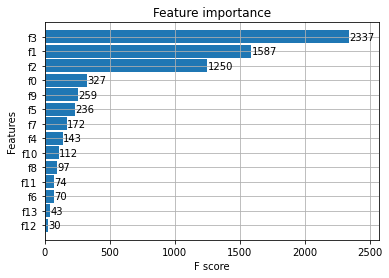

In [ ]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

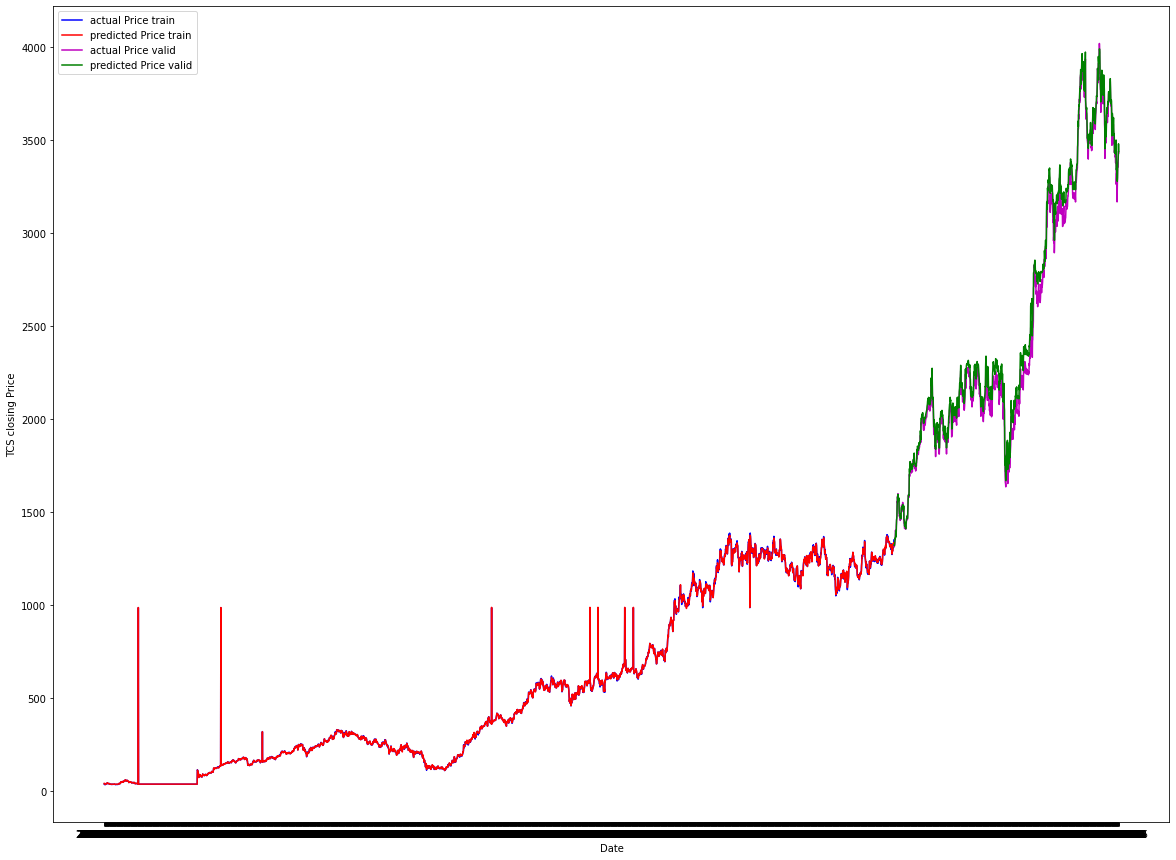

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('TCS closing Price')
plt.legend()
plt.show()

Training Model Again 

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[21:04:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.347824	validation_1-rmse:0.268816
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.344397	validation_1-rmse:0.26622
[2]	validation_0-rmse:0.341004	validation_1-rmse:0.26364
[3]	validation_0-rmse:0.337645	validation_1-rmse:0.261149
[4]	validation_0-rmse:0.334318	validation_1-rmse:0.258644
[5]	validation_0-rmse:0.331025	validation_1-rmse:0.256141
[6]	validation_0-rmse:0.327764	validation_1-rmse:0.253674
[7]	validation_0-rmse:0.324535	validation_1-rmse:0.251192
[8]	validation_0-rmse:0.321338	validation_1-rmse:0.248769
[9]	validation_0-rmse:0.318173	validation_1-rmse:0.246384
[10]	validation_0-rmse:0.315039	validation_1-rmse:0.24397
[11]	validation_0-rmse:0.311935	validation_1-rmse:0.241652
[12]	validation_0-

XGBRegressor(learning_rate=0.0099, max_depth=15, n_estimators=1000)

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

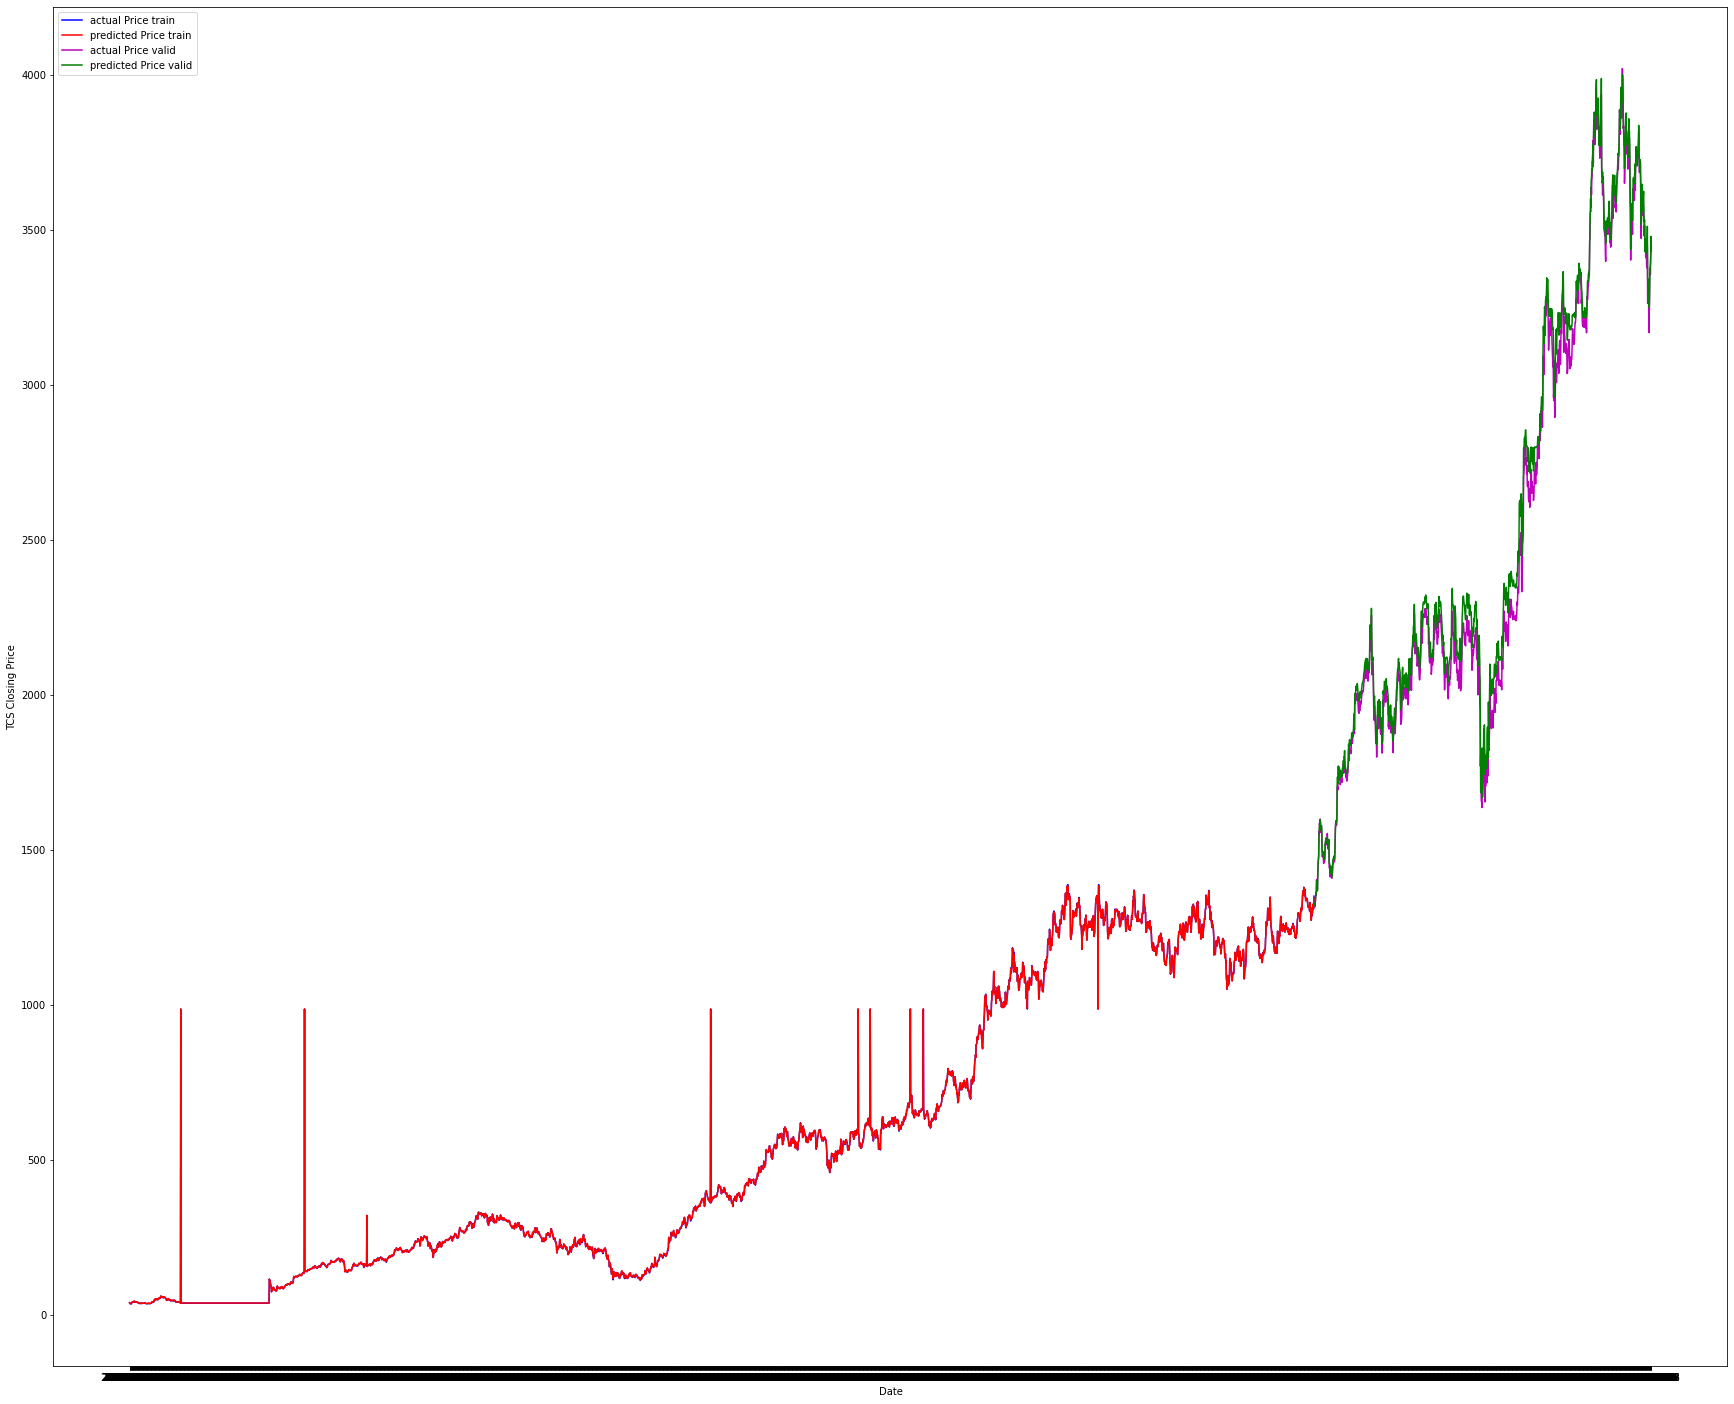

In [ ]:
plt.figure(figsize=(30,25))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('TCS Closing Price')
plt.legend()
plt.show()

## **PREDICTIONS OF WIPRO STOCK PRICES **

### Importing Important Libraries 


*   Numpy- Used for Linear Algebra
*   Pandas - Used for data processing / reading dataset
*   Seaborn and Matplotlib - Used for graphical representation



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


Reading and Viewing the dataset using Pandas

In [ ]:

import time
import datetime
import pandas as pd

ticker = 'WIPRO.NS'
period1 = int(time.mktime(datetime.datetime(2000, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 6, 6, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
df.to_csv('WIPRO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,102.150002,102.157501,102.150002,102.157501,83.541771,42639.0
1,2000-01-04,110.330627,110.330627,110.330627,110.330627,90.225548,117119.0
2,2000-01-05,110.330627,119.158127,101.812508,112.128754,91.695999,3527919.0
3,2000-01-06,117.926254,119.362503,104.625008,109.959381,89.921944,1942399.0
4,2000-01-07,103.162506,103.162506,101.163757,101.163757,82.729141,269599.0


Plotting a Correlation Heatmap

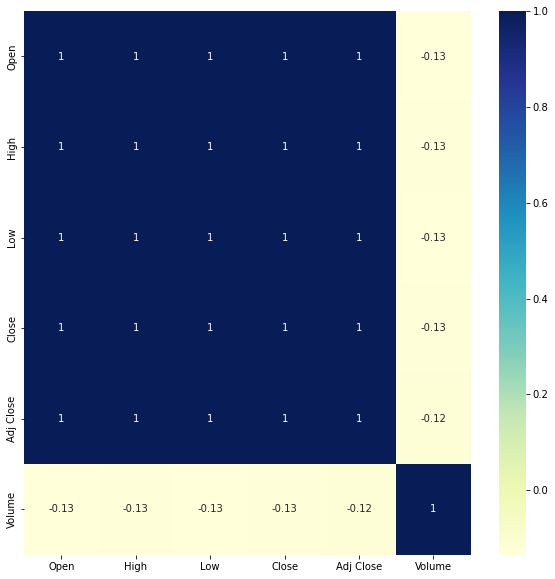

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Generating New Features based on Important features

In [ ]:
data = df[['Date','Open','High','Low','Volume',]]

Setting Index as Date

In [ ]:
df.set_index("Date", drop=False, inplace=True)

Visual Representation of Closing Price

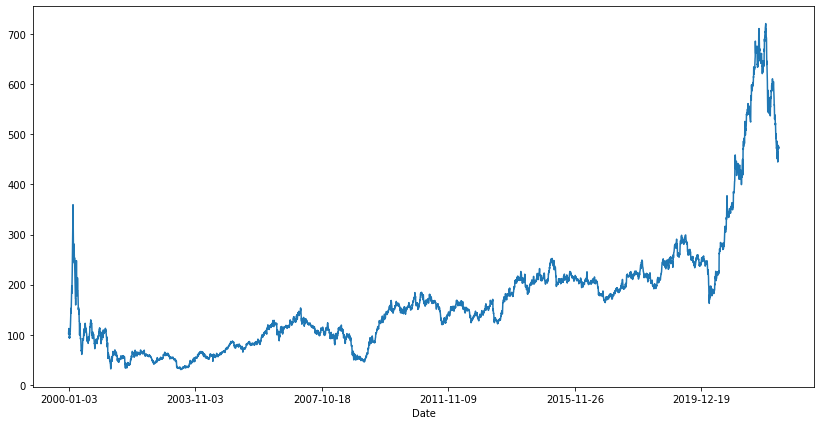

In [ ]:
df.Close.plot(figsize=(14, 7))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5612 non-null   object 
 1   Open    5605 non-null   float64
 2   High    5605 non-null   float64
 3   Low     5605 non-null   float64
 4   Volume  5605 non-null   float64
dtypes: float64(4), object(1)
memory usage: 219.3+ KB


Generating New Features - Lag and Window Features for features related to Closing Price

In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low",]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

Setting All Null/NaN values of a feature as mean of that feature

In [ ]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Setting Date as Index and viewing Dataset

In [ ]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7
Date,,,,,,,,,,,,,
2000-01-03,2000-01-03,102.150002,102.157501,102.150002,102.157501,83.541771,42639.0,170.151382,3.630560,172.533356,3.432696,167.509369,3.446452
2000-01-04,2000-01-04,110.330627,110.330627,110.330627,110.330627,90.225548,117119.0,102.150002,3.630560,102.157501,3.432696,102.150002,3.446452
2000-01-05,2000-01-05,110.330627,119.158127,101.812508,112.128754,91.695999,3527919.0,106.240318,5.784575,106.244064,5.779273,106.240318,5.784575
2000-01-06,2000-01-06,117.926254,119.362503,104.625008,109.959381,89.921944,1942399.0,107.603752,4.723086,110.548752,8.502412,104.764381,4.823465
2000-01-07,2000-01-07,103.162506,103.162506,101.163757,101.163757,82.729141,269599.0,112.862503,6.442842,116.283752,8.222807,105.589378,3.938959


Extracting Date Time Features from the dataset 


In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,102.150002,102.157501,102.150002,102.157501,83.541771,42639.0,170.151382,3.630560,172.533356,3.432696,167.509369,3.446452,1,3,0
2000-01-04,2000-01-04,110.330627,110.330627,110.330627,110.330627,90.225548,117119.0,102.150002,3.630560,102.157501,3.432696,102.150002,3.446452,1,4,1
2000-01-05,2000-01-05,110.330627,119.158127,101.812508,112.128754,91.695999,3527919.0,106.240318,5.784575,106.244064,5.779273,106.240318,5.784575,1,5,2
2000-01-06,2000-01-06,117.926254,119.362503,104.625008,109.959381,89.921944,1942399.0,107.603752,4.723086,110.548752,8.502412,104.764381,4.823465,1,6,3
2000-01-07,2000-01-07,103.162506,103.162506,101.163757,101.163757,82.729141,269599.0,112.862503,6.442842,116.283752,8.222807,105.589378,3.938959,1,7,4


Splitting Dataset into Training and Testing Data

In [ ]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [ ]:
df_train.shape

(4519, 16)

In [ ]:
df_valid.shape

(1093, 16)

In [ ]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Open,102.150002,110.330627,110.330627,117.926254,103.162506
High,102.157501,110.330627,119.158127,119.362503,103.162506
Low,102.150002,110.330627,101.812508,104.625008,101.163757
Close,102.157501,110.330627,112.128754,109.959381,101.163757
Adj Close,83.541771,90.225548,91.695999,89.921944,82.729141
Volume,42639.0,117119.0,3527919.0,1942399.0,269599.0
Open_mean_lag3,170.151382,102.150002,106.240318,107.603752,112.862503
Open_std_lag7,3.63056,3.63056,5.784575,4.723086,6.442842
High_mean_lag3,172.533356,102.157501,106.244064,110.548752,116.283752


Scaling Data and Transforming it for Training

In [ ]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [ ]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [ ]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [ ]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

### Importing XGBoost library

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost Tuning

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[21:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.268915	validation_1-rmse:0.321292
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.266256	validation_1-rmse:0.318346
[2]	validation_0-rmse:0.263624	validation_1-rmse:0.315435
[3]	validation_0-rmse:0.261018	validation_1-rmse:0.312592
[4]	validation_0-rmse:0.258438	validation_1-rmse:0.309729
[5]	validation_0-rmse:0.255884	validation_1-rmse:0.306974
[6]	validation_0-rmse:0.253356	validation_1-rmse:0.304292
[7]	validation_0-rmse:0.250852	validation_1-rmse:0.301595
[8]	validation_0-rmse:0.248374	validation_1-rmse:0.298969
[9]	validation_0-rmse:0.245919	validation_1-rmse:0.296308
[10]	validation_0-rmse:0.243489	validation_1-rmse:0.293666
[11]	validation_0-rmse:0.241084	validation_1-rmse:0.291136
[12]	validation

XGBRegressor(learning_rate=0.01, n_estimators=1000)

<Figure size 864x576 with 0 Axes>

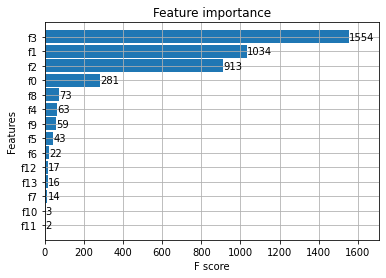

In [ ]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

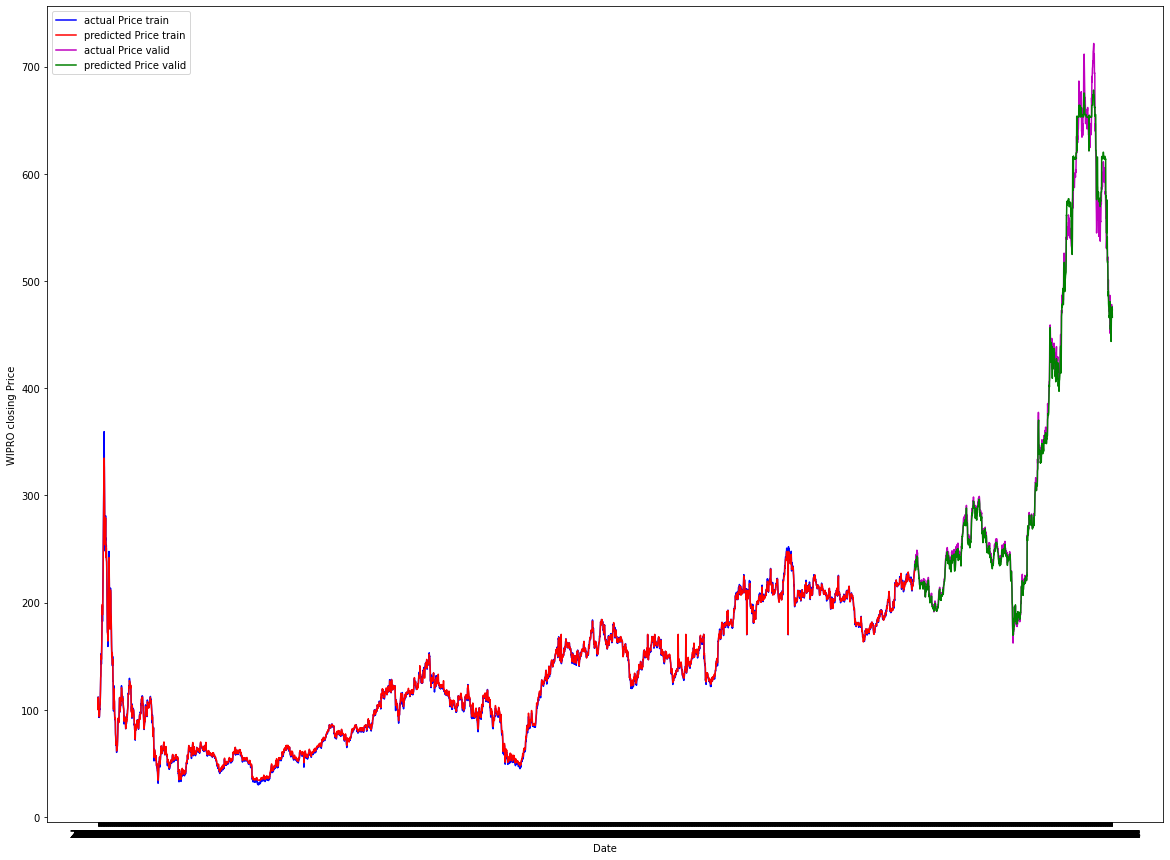

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('WIPRO closing Price')
plt.legend()
plt.show()

Training Model Again 

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[21:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.268926	validation_1-rmse:0.321063
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.266278	validation_1-rmse:0.317905
[2]	validation_0-rmse:0.263656	validation_1-rmse:0.314777
[3]	validation_0-rmse:0.26106	validation_1-rmse:0.311681
[4]	validation_0-rmse:0.258489	validation_1-rmse:0.308616
[5]	validation_0-rmse:0.255944	validation_1-rmse:0.305565
[6]	validation_0-rmse:0.253423	validation_1-rmse:0.302567
[7]	validation_0-rmse:0.250928	validation_1-rmse:0.299586
[8]	validation_0-rmse:0.248457	validation_1-rmse:0.296642
[9]	validation_0-rmse:0.246012	validation_1-rmse:0.29374
[10]	validation_0-rmse:0.243589	validation_1-rmse:0.290842
[11]	validation_0-rmse:0.241191	validation_1-rmse:0.287981
[12]	validation_0

XGBRegressor(learning_rate=0.0099, max_depth=15, n_estimators=1000)

Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

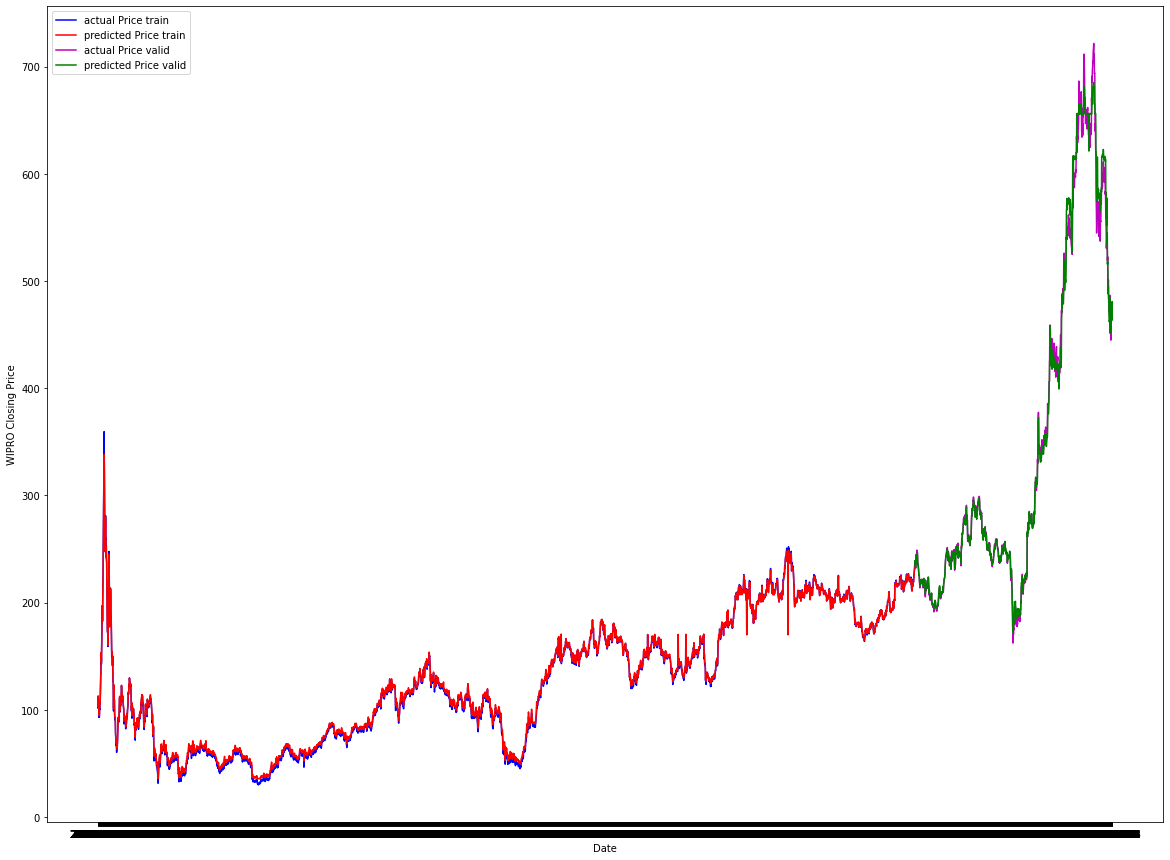

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('WIPRO Closing Price')
plt.legend()
plt.show()